In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('placement.csv')

In [3]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
data.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

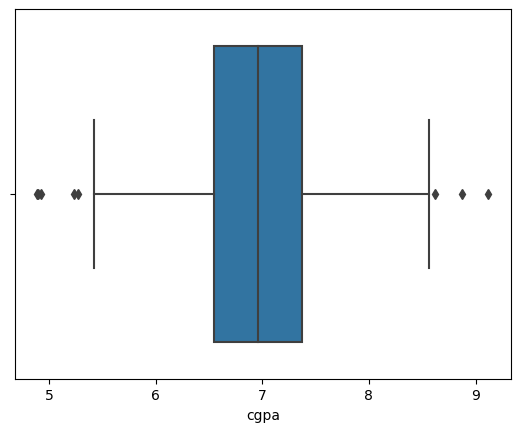

In [5]:
sns.boxplot(data['cgpa'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

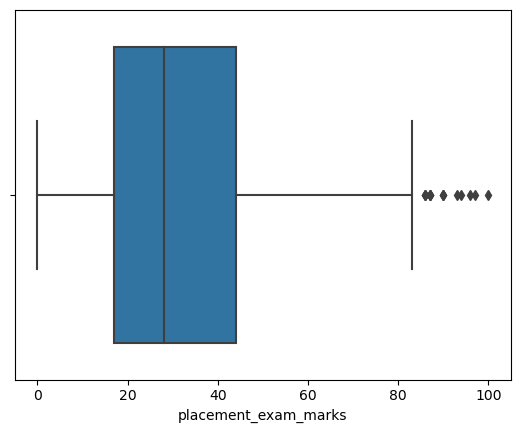

In [6]:
sns.boxplot(data['placement_exam_marks'])

In [7]:
data['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

# cgpa column

In [8]:
cgpa_mean = data['cgpa'].mean()
cgpa_std = data['cgpa'].std()

In [9]:
cgpa_HV = cgpa_mean+3*cgpa_std
cgpa_LV = cgpa_mean-3*cgpa_std

In [10]:
print(cgpa_HV)
print(cgpa_LV)

8.808933625397177
5.113546374602842


In [11]:
# print outliers
data[(data['cgpa']>cgpa_HV) | (data['cgpa']<cgpa_LV)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### trimming

In [12]:
new_data = data[(data['cgpa']<cgpa_HV) & (data['cgpa']>cgpa_LV)]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [13]:
# calculate z-score

data['cgpa_z_score'] = (data['cgpa']-cgpa_mean)/cgpa_std

In [14]:
data.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [15]:
# if z_score is in between -3 to 3 then it is not an outlier

data[(data['cgpa_z_score']>3) | (data['cgpa_z_score']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [16]:
new_data = data[(data['cgpa_z_score']<=3) & (data['cgpa_z_score']>=-3)]
new_data

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### capping

In [17]:
upper_limit = cgpa_HV
lower_limit = cgpa_LV

In [18]:
upper_limit

8.808933625397177

In [19]:
lower_limit

5.113546374602842

In [20]:
data['cgpa'] = np.where(
                        data['cgpa']>upper_limit, upper_limit,
                                                               np.where(
                                                                        data['cgpa']<lower_limit,lower_limit,data['cgpa']
                                                                        )
                        )

In [21]:
data.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [23]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64